# Trabalho final de Processamento Digital de Sinais

## Assunto: Projeto e Implementação de Filtro Digital


Para um dado problema de PDS, projetar um Filtro Digital e simular e implementar o filtro, interpretando os sinais de entrada e de saída, nos domínios do tempo discreto e da frequência. O projeto e a implementação do filtro deve contemplar as seguintes etapas.

- 1. Definir o sinal em tempo contínuo;
- 2. Análise do sinal contínuo no domínio da frequência;
- 3. Definir o filtro anti-aliasing e a frequência de amostragem apropriada;
- 4. Amostrar e reconstruir o sinal contínuo;
- 5. Análise do sinal discreto no domínio da frequência;
- 6. Definir a banda de frequência de interesse de acordo com a aplicação selecionada;
- 7. Definir as especificações do Filtro Digital e Projetar o Filtro;
- 8. Análise do sinal de saída do filtro digital;
- 9. Comentar e justificar todas as etapas;
- 10. Simulação e implementação completa

O trabalho deverá ser exposto em sessão oral em sala de aula, com tempo máximo de apresentação de 15 minutos, no dia 27 de Junho de 2022. Os recursos disponíveis serão: COLAB, projetor multimídia e quadro branco.

### Utilizando o biblioteca soundfile para armazenar o sinal do áudio

In [1]:
!pip install soundfile

### Bibliotecas utilizadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import soundfile as sf
from IPython.display import Audio
from scipy.signal import butter, lfilter
from scipy import signal

### Armazenando as variáveis para desenvolvimento do trabalho

- audio_noast = audio com ruído (problema)

In [3]:
audio_noast = 'sirene.wav'
problem = Audio(filename = audio_noast)

In [4]:
problem

### Armazenando sinal, taxa de amostragem, tempo e mostrando informações

- signal, samplerate = sinal e taxa de amostragem (fs)
- time = array de 0 ao produto de 1/tx de amostragem com tamanho do sinal, e de passo em passo 1 dividido pela tx de amostragem

- tempo em segundos
- sinal em domínio do tempo



In [5]:
_signal, samplerate = sf.read(audio_noast)
time = np.arange(0, len(_signal)*1/samplerate, 1/samplerate)
print(sf.info(audio_noast))
print('n_Frames: ', _signal.size)

sirene.wav
samplerate: 48000 Hz
channels: 2
duration: 16.235 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
n_Frames:  1558528


### Plotando gráfico do sinal em domínio do tempo (s)

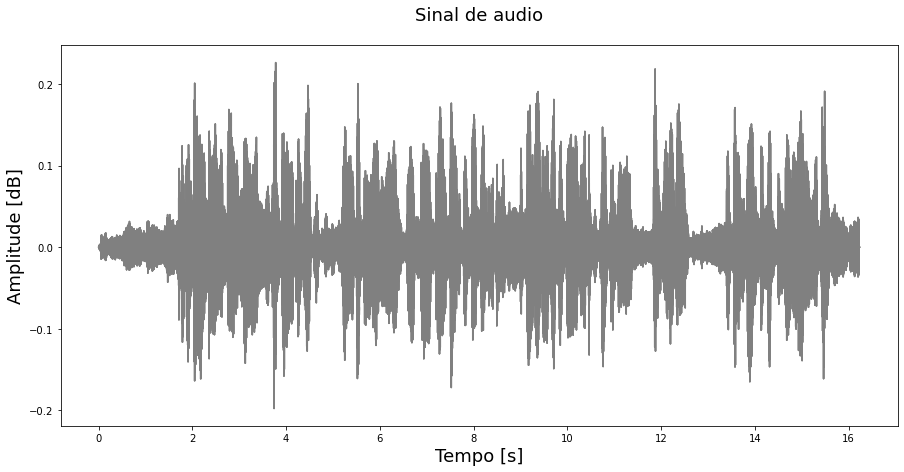

In [6]:
plt.figure(figsize=(15,7))
plt.plot(time, _signal, 'gray')
plt.xlabel('Tempo [s]', fontdict={'fontsize':18})
plt.ylabel('Amplitude [dB]', fontdict={'fontsize':18})
plt.title('Sinal de audio', fontdict={'fontsize':18}, pad=25)
plt.show()

### Transformada de Fourier

####  - Um pouco sobre a transformada de fourier

A transformada de Fourier é comumente usada para converter um sinal no tempo em um espectro de frequência. Esse método utiliza o fato de que toda função não-linear pode ser representada como uma soma de ondas senoidais (infinitas). A transformada separa um sinal de tempo e retorna informações sobre a frequência de todas as ondas senoidais necessárias para simular o sinal de tempo. (fonte: https://www.monolitonimbus.com.br/transformada-de-fourier-em-python/)


- Transformada de Fourier

Para sequências de valores uniformemente espaçados, a Transformada Discreta de Fourier (“Discrete Fourier Transform” – DFT) é definida como:

![Transformada de Fourier](https://maestrovirtuale.com/wp-content/uploads/2019/10/tdf-2.gif)


Onde:

    N = número de amostras
    n = n-ésima amostra (ordem do harmônico)
    k = frequência atual (0 Hz a N-1 Hz)
    X[k] = números complexos resultantes da DFT (amplitude e fase)
    xn = números complexos (com parte imaginária nula ou não) do valor do sinal no instante n


In [12]:
frequency_domine = np.fft.fft(_signal)

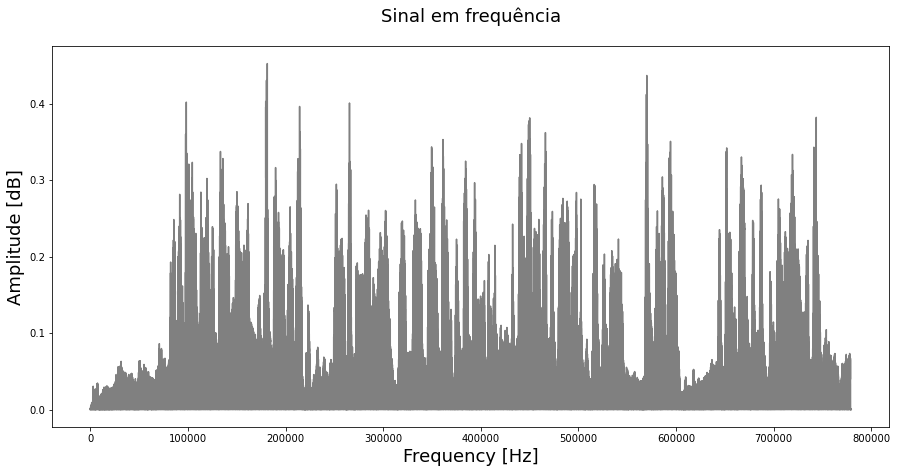

In [14]:
plt.figure(figsize=(15,7))
plt.plot(np.abs(frequency_domine), 'gray')
plt.xlabel('Frequency [Hz]', fontdict={'fontsize':18})
plt.ylabel('Amplitude [dB]', fontdict={'fontsize':18})
plt.title('Sinal em frequência', fontdict={'fontsize':18}, pad=25)
plt.show()

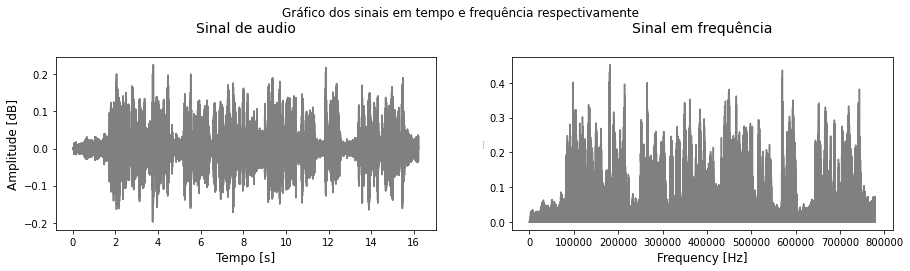

In [15]:
fig = plt.figure(figsize=(15,7))
fig.suptitle('Gráfico dos sinais em tempo e frequência respectivamente')

ax = plt.subplot(2,2,1)
ax.plot(time, _signal, 'gray')
ax.set_xlabel('Tempo [s]', fontdict={'fontsize':12})
ax.set_ylabel('Amplitude [dB]', fontdict={'fontsize':12})
ax.set_title('Sinal de audio', fontdict={'fontsize':14}, pad=25)


bx = plt.subplot(2,2,2)
bx.plot(np.abs(frequency_domine), 'gray')
bx.set_xlabel('Frequency [Hz]', fontdict={'fontsize':12})
bx.set_ylabel('Amplitude [dB]', fontdict={'fontsize':1})
bx.set_title('Sinal em frequência', fontdict={'fontsize':14}, pad=25)


plt.show()

In [20]:
from scipy import signal
from matplotlib import pyplot as plt

def butter_pass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs # Nyquist frequency
    normal_cutoff = cutoff / nyq  # A fraction b/w 0 and 1 of sampling rate
    print("normal_cutoff:", normal_cutoff, (data.shape[0] / 2) * normal_cutoff) # Tricky ? 
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    y = signal.filtfilt(b, a, data)

    def _plot_graph():
      # Get the filter coefficients so we can check its frequency response.
      # Plot the frequency response.
      w, h = signal.freqz(b, a, worN=8000)
      plt.subplot(2, 1, 1)
      plt.plot(0.5 *fs*w/np.pi, np.abs(h), 'b')
      plt.plot(cutoff, 0.5 * np.sqrt(2), 'ko')
      plt.axvline(cutoff, color='k')
      plt.xlim(0, 0.5*fs)
      plt.title("Filter Frequency Response")
      plt.xlabel('Frequency [Hz]')
      plt.grid()
      plt.show()
    _plot_graph()
    return y

In [22]:
fc = 0.40
order = 10
y = butter_pass_filter(_signal, fc, fs, order)

normal_cutoff: 1.6666666666666667e-05 6.493866666666667


ValueError: The length of the input vector x must be greater than padlen, which is 33.

In [18]:
fc = 0.40
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)

sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

s = list(_signal)
news = np.convolve(s, sinc_func)

ValueError: object too deep for desired array

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(news)
plt.xlabel('$Hz$', fontdict={'fontsize':18})
plt.ylabel('$Amplitude$', fontdict={'fontsize':18})
plt.title('Sinal em frequência', fontdict={'fontsize':18}, pad=25)
plt.show()

In [ ]:
frequency_domine_filtred = np.fft.fft(news)
magnitude_filtred = np.abs(frequency_domine_filtred)

plt.figure(figsize=(15,7))
plt.plot(magnitude_filtred/samplerate)
plt.xlabel('$Hz$', fontdict={'fontsize':18})
plt.ylabel('$Amplitude$', fontdict={'fontsize':18})
plt.title('Sinal em frequência', fontdict={'fontsize':18}, pad=25)
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(magnitude_filtred/samplerate)
plt.xlabel('$Hz$', fontdict={'fontsize':18})
plt.ylabel('$Amplitude$', fontdict={'fontsize':18})
plt.xlim(0,44100)
plt.title('Sinal em frequência', fontdict={'fontsize':18}, pad=25)
plt.show()

In [ ]:
Audio(data=news, rate=samplerate)